In [1]:
!pip install deepface

     |████████████████████████████████| 61kB 5.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 17.5MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=d252c7eeffb7d5d61a75a85d21818f857f0dc9e76457fb1e931f1bb7a26aee35
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [2]:
# pretrained models are at: 
# https://drive.google.com/drive/folders/1VIo1mQyUkpjSo3rRBY95--6zDPrQjF15?usp=sharing 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp "/content/gdrive/My Drive/deepface-pretrained" -r "/content"

In [4]:
from pathlib import Path
from deepface import DeepFace   # this line will create the /root/.deepface/weights folder
home = str(Path.home())
print("HOME_FOLDER is ",home)

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
HOME_FOLDER is  /root


In [5]:
!mv /content/deepface-pretrained/age_model_weights.h5  /root/.deepface/weights 
!mv /content/deepface-pretrained/race_model_single_batch.h5  /root/.deepface/weights
!mv /content/deepface-pretrained/gender_model_weights.h5  /root/.deepface/weights
!mv /content/deepface-pretrained/facial_expression_model_weights.h5  /root/.deepface/weights   
!mv /content/deepface-pretrained/retinaface.h5  /root/.deepface/weights 

In [7]:
from deepface import DeepFace
result  = DeepFace.verify("emmastone1.jpg", "/content/db/emmastone2.jpg")
print("Is verified: ", result["verified"])

Is verified:  True


In [8]:
from deepface import DeepFace
import pandas as pd
df = DeepFace.find(img_path = "emmastone1.jpg", db_path = "/content/db")
print(df["VGG-Face_cosine"])

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

Representations stored in  /content/db / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

find function lasts  3.5550644397735596  seconds
0    0.243839
Name: VGG-Face_cosine, dtype: float64


In [33]:
from deepface import DeepFace
result  = DeepFace.verify("emmastone1.jpg", "/content/24June21.jpeg", distance_metric='cosine')
print("Is verified: ", result["verified"])

Is verified:  True


In [10]:
metrics = ["cosine", "euclidean", "euclidean_l2"]
for metric in metrics:
   result = DeepFace.verify("emmastone1.jpg", "/content/db/emmastone2.jpg", distance_metric = metric)
   print(result)
   df = DeepFace.find(img_path = "emmastone1.jpg", db_path = "/content/db", distance_metric = metric)
   print(df)

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

{'verified': True, 'distance': 0.24383859081505233, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}
There are  2  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


find function lasts  1.571476936340332  seconds
                     identity  VGG-Face_cosine
0  /content/db/emmastone2.jpg         0.243839


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

{'verified': True, 'distance': 0.44696328952054337, 'max_threshold_to_verify': 0.55, 'model': 'VGG-Face', 'similarity_metric': 'euclidean'}
There are  2  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


find function lasts  1.5947341918945312  seconds
                     identity  VGG-Face_euclidean
0  /content/db/emmastone2.jpg            0.446963


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

{'verified': True, 'distance': 0.6983388730624301, 'max_threshold_to_verify': 0.75, 'model': 'VGG-Face', 'similarity_metric': 'euclidean_l2'}
There are  2  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

find function lasts  1.5896766185760498  seconds
                     identity  VGG-Face_euclidean_l2
0  /content/db/emmastone2.jpg               0.698339


In [11]:
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "emmastone1.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

31  years old  white   happy   Woman


In [13]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']
for backend in backends:
   #facial analysis
   obj = DeepFace.analyze("/content/db/emmastone2.jpg", detector_backend = backend)
   print("\n",obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]


 28  years old  white   happy   Woman
deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt


28.1kB [00:00, 28.7MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel


  0%|          | 0.00/10.7M [00:00<?, ?B/s]

100%|██████████| 10.7M/10.7M [00:00<00:00, 78.0MB/s]

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]


 30  years old  white   neutral   Woman


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2


0.00B [00:00, ?B/s]

shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded




49.3kB [00:00, 371kB/s]

211kB [00:00, 465kB/s] 

754kB [00:00, 630kB/s]

1.90MB [00:00, 871kB/s]

5.71MB [00:00, 7.76MB/s]

Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]


 28  years old  white   neutral   Woman



Action: race: 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]


 30  years old  white   happy   Woman



Action: race: 100%|██████████| 4/4 [00:18<00:00,  4.70s/it]


 30  years old  white   happy   Woman


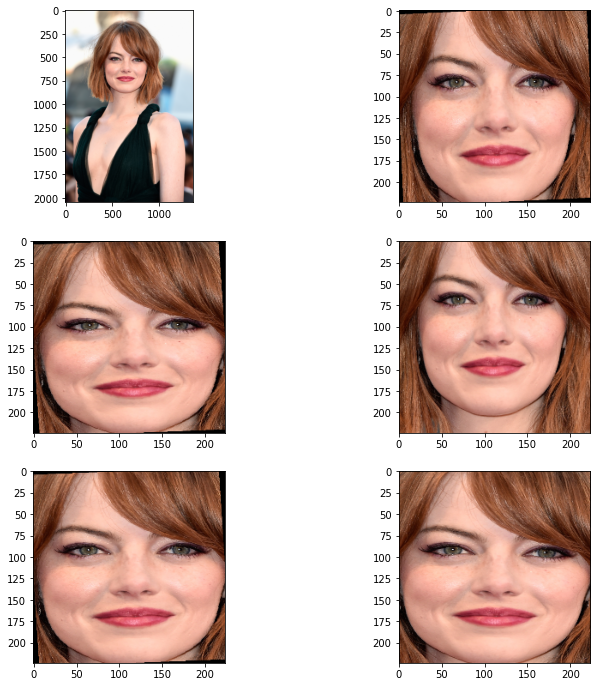

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline

_, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

img = plt.imread("emmastone1.jpg")
axs[0].imshow(img)
for idx, backend in enumerate(backends):
   #face detection and alignment
   detected_face = DeepFace.detectFace("emmastone1.jpg", detector_backend = backend)
   axs[idx+1].imshow(detected_face)
   
plt.imshow(detected_face)